# Is PCA better than AEs?

https://arxiv.org/pdf/2103.04874.pdf

In [10]:
import numpy as np
import matplotlib.pyplot as plt

data_path = '../data'

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# download and transform train dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST(data_path, 
                                                          download=True, 
                                                          train=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

# download and transform test dataset
test_loader = torch.utils.data.DataLoader(datasets.MNIST(data_path, 
                                                          download=True, 
                                                          train=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

## PCA lowrank


In [70]:
U,S,V = torch.pca_lowrank(train_loader.dataset.data.double(), q=10, center=True, niter=5)

t1 = train_loader.dataset.data[0].double()

torch.Size([60000, 28, 10])
torch.Size([60000, 10])
torch.Size([60000, 28, 10])


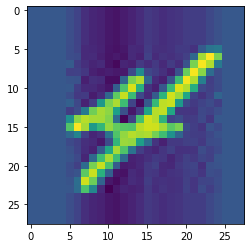

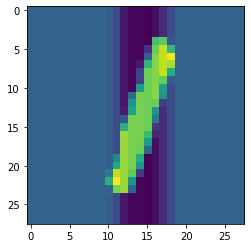

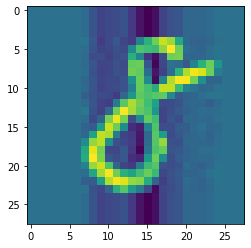

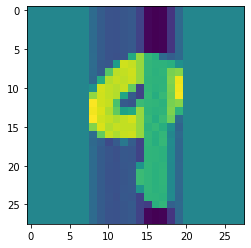

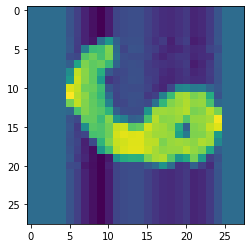

In [71]:
print(U.shape)
print(S.shape)
print(V.shape)

for i in range(5):
    i = np.random.randint(0,60000)
    plt.imshow(torch.matmul(U[i],torch.matmul(torch.diag(S[i]), V[i].T)))
    plt.show()